###  1. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load & Preview Dataset

In [40]:
df = pd.read_csv("agriculture_dataset.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB


### 3. Clean & Prepare Data

In [43]:
# Rename columns for easier access
df.columns = ['Farm_ID', 'Crop_Type', 'Farm_Area', 'Irrigation_Type', 'Fertilizer_Used',
              'Pesticide_Used', 'Yield', 'Soil_Type', 'Season', 'Water_Usage']

### 4. Exploratory Data Analysis (EDA)

In [51]:
#4A. Distribution of Numerical Columns

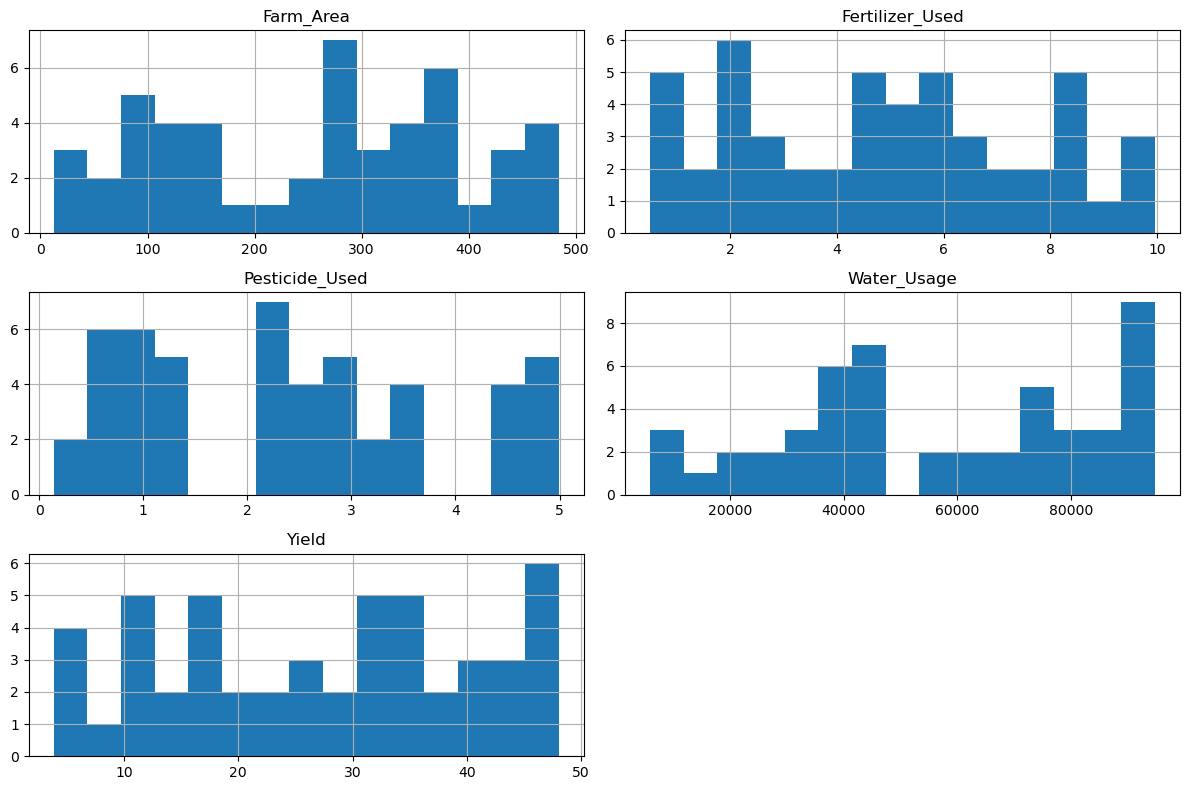

In [46]:
df[['Farm_Area', 'Fertilizer_Used', 'Pesticide_Used', 'Water_Usage', 'Yield']].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [53]:
#4B.Categorical Feature Counts

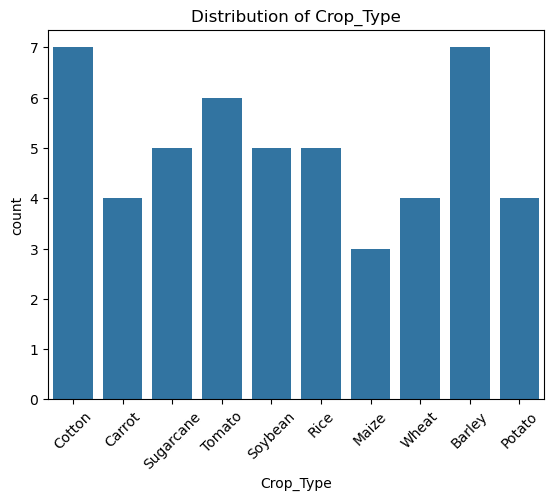

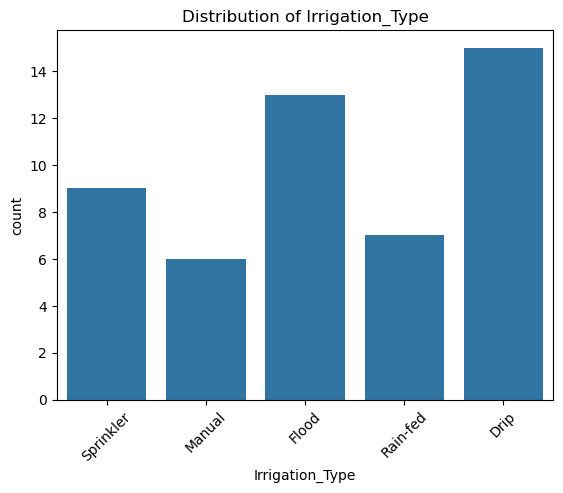

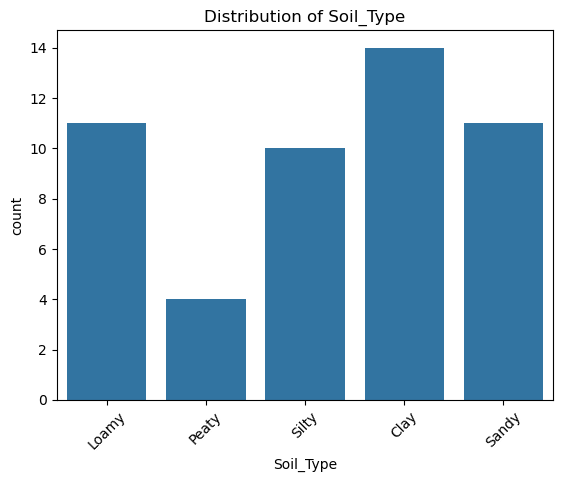

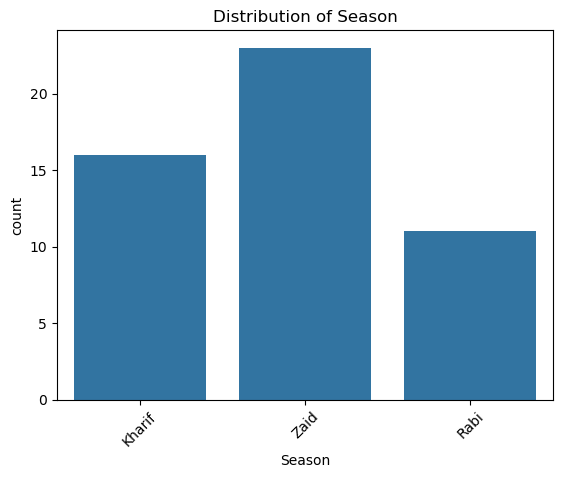

In [60]:
categorical_features = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
for col in categorical_features:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

In [57]:
#4C. Correlation Heatmap

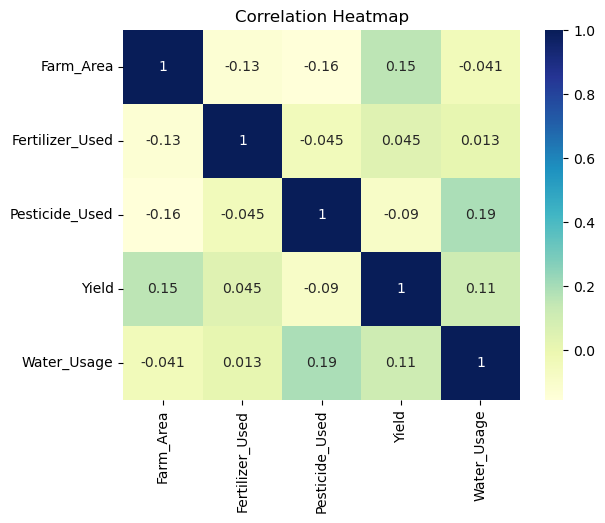

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### 5. Feature vs Yield Analysis

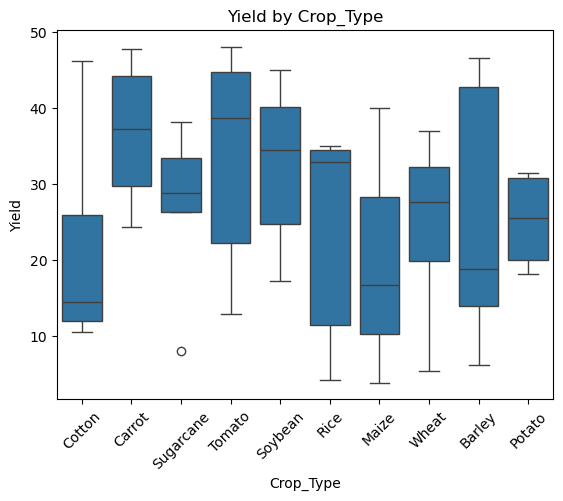

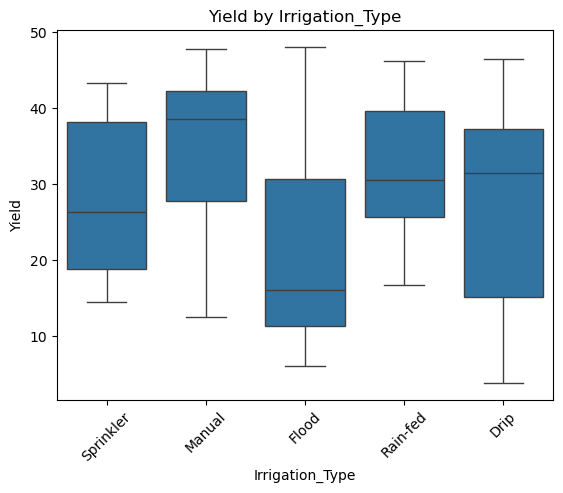

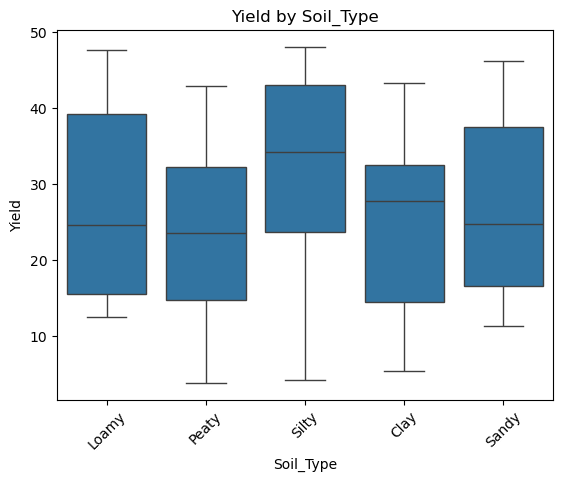

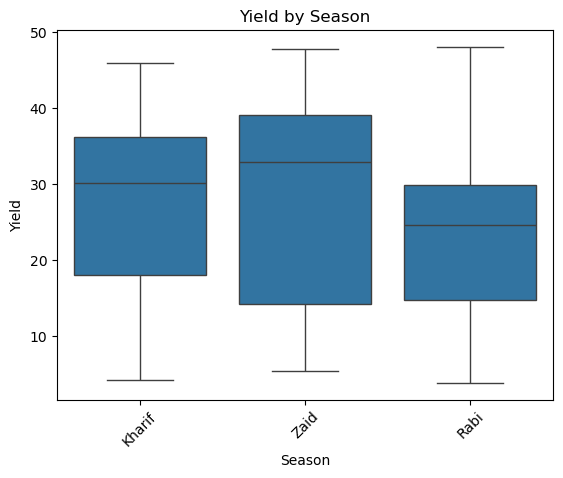

In [68]:
# Boxplots for categorical features vs Yield
for col in ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']:
    sns.boxplot(x=col, y='Yield', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Yield by {col}')
    plt.show()

### 6. Feature Engineering (Optional)

In [70]:
df_encoded = pd.get_dummies(df.drop(columns=['Farm_ID']), drop_first=True)

### 7. Modeling (Custom for You: Try only 2 models)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Prepare data
X = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred):.2f}, R2: {r2_score(y_test, y_pred):.2f}")

Linear Regression - MSE: 195.87, R2: -0.23
Random Forest - MSE: 154.80, R2: 0.03


In [75]:
#7.5 – Model Evaluation Visualizations

In [89]:
#A. Residual Plot 

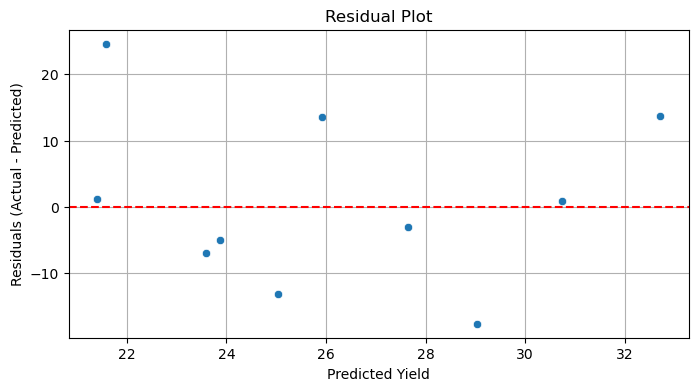

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict with best model 
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Yield")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [81]:
#B. Feature Importance Plot (Random Forest Only)

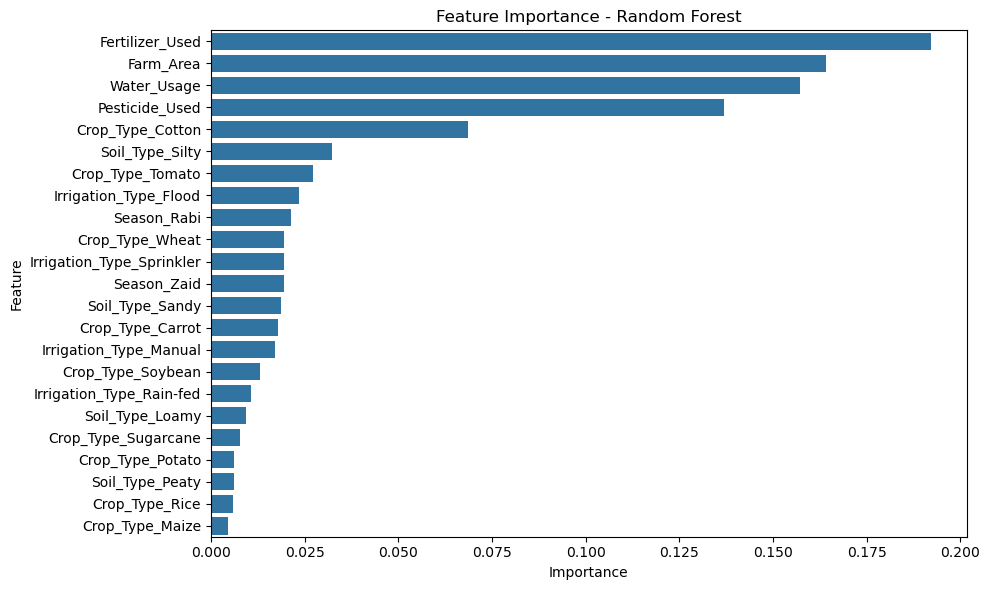

In [83]:
# Get feature importances
importances = best_model.feature_importances_
features = X.columns

# Plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [85]:
#C. Cross-Validation

In [87]:
from sklearn.model_selection import cross_val_score

# Cross-validated R2 score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Average CV R2:", np.mean(cv_scores).round(3))

Cross-validated R2 scores: [-0.42312273 -0.05894282 -0.29039152 -0.1216582   0.11637282]
Average CV R2: -0.156


In [95]:
# 9 – Saved the Trained Model ( demo? )

In [93]:
import joblib
joblib.dump(best_model, "best_crop_yield_model.pkl")

['best_crop_yield_model.pkl']